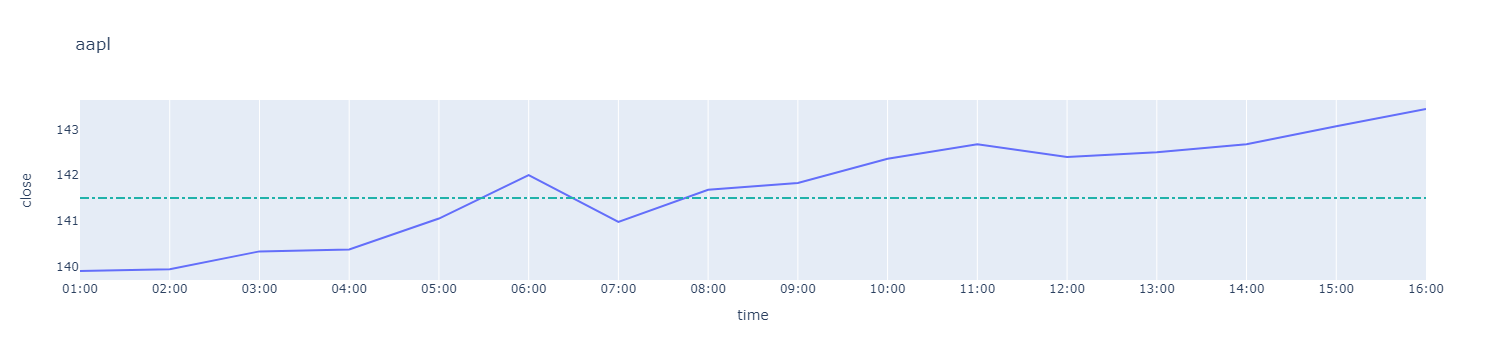

In [134]:
import datetime as dt
import plotly.express as px
import numpy as np
import pandas as pd
import pandasql as ps
import plotly.graph_objects as go

# Read complete stocks.json file
a = pd.read_json("stocks.json")

#Pick one day of a single stock
aapl = ps.sqldf("SELECT * from a where date like '2022-10-17%' and ticker = 'AAPL' order by time",locals())
fake_close = 141.5

customdata  = np.stack((aapl['open'], aapl['high'], aapl['low'], aapl['volume'], aapl['time']), axis=-1)
fig = px.line(data_frame=aapl,x='time', y='close',title='aapl',template='plotly')
fig.update_layout(shapes=[
    # adds line at y=5
    dict(
      type= 'line',
      xref= 'paper', x0=0, x1=1,
      yref= 'y', y0= fake_close, y1= fake_close,
      line=dict(
        color="LightSeaGreen",
        width=2,
        dash="dashdot",
    )
    )
])


fig.update_traces(customdata = customdata, hovertemplate=
                                                                                'open: </b>%{customdata[0]: .2f} <br>' + \
                                                                                'high: </b>%{customdata[1]: .2f} <br>' + \
                                                                                'low: </b>%{customdata[2]: .2f} <br>' + \
                                                                                'volume: </b>%{customdata[3]: ,} <br>'+ \
                                                                                 '<extra> AAPL </extra>'
                 )
fig.update_layout(yaxis=dict(showgrid=False))

fig.show()

In [25]:
print(fig.__dir__())

['_validate', '_grid_str', '_grid_ref', '_data_validator', '_data_objs', '_data', '_data_defaults', '_layout_validator', '_layout_obj', '_layout', '_layout_defaults', '_config', '_frames_validator', '_frame_objs', '_in_batch_mode', '_batch_trace_edits', '_batch_layout_edits', '_animation_duration_validator', '_animation_easing_validator', '_px_trendlines', '__module__', '__init__', 'update', 'update_traces', 'update_layout', 'for_each_trace', 'add_trace', 'add_traces', 'add_vline', 'add_hline', 'add_vrect', 'add_hrect', 'set_subplots', 'add_bar', 'add_barpolar', 'add_box', 'add_candlestick', 'add_carpet', 'add_choropleth', 'add_choroplethmapbox', 'add_cone', 'add_contour', 'add_contourcarpet', 'add_densitymapbox', 'add_funnel', 'add_funnelarea', 'add_heatmap', 'add_heatmapgl', 'add_histogram', 'add_histogram2d', 'add_histogram2dcontour', 'add_icicle', 'add_image', 'add_indicator', 'add_isosurface', 'add_mesh3d', 'add_ohlc', 'add_parcats', 'add_parcoords', 'add_pie', 'add_pointcloud', '

In [10]:
aapl.head()

,ticker,date,time,open,high,low,close,volume
0,AAPL,2022-10-17 00:00:00.000000,01:00,142.99,142.99,139.58,139.9000,51719
1,AAPL,2022-10-17 00:00:00.000000,02:00,139.81,140.10,139.76,139.9400,28166
2,AAPL,2022-10-17 00:00:00.000000,03:00,139.98,140.44,139.85,140.3300,69309
3,AAPL,2022-10-17 00:00:00.000000,04:00,140.31,140.44,139.89,140.3700,147753
4,AAPL,2022-10-17 00:00:00.000000,05:00,140.20,141.20,139.07,141.0497,578075
